In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm
import cv2
from PIL import Image
import io

## Read training and test data

* Read train.csv file for training images. Each row has 784 columns to constitute an image and one column for output data.
* Read test.csv file for test images as done for training images.

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
output_dir = output_dir.replace('\\train','')
os.chdir(output_dir)

## Save training images

* Save training grayscale images into train folder. 

In [ ]:
#Save training images
output_dir = os.getcwd()
output_dir = output_dir+'\\train'
os.chdir(output_dir)
for i in range(len(df_train)):
    fname = str(i+1)+'.jpg'
    plt.imsave(fname,np.reshape(np.array(df_train.iloc[i,1:]),(28,28)),cmap=cm.gray)

output_dir = output_dir.replace('\\train','')
os.chdir(output_dir)

## Save test images

* Save test grayscale images into test folder. 

In [ ]:
#Save test images
output_dir = os.getcwd()
output_dir = output_dir+'\\test'
os.chdir(output_dir)
for i in range(len(df_test)):
    fname = str(i+1)+'.jpg'
    plt.imsave(fname,np.reshape(np.array(df_test.iloc[i,:]),(28,28)),cmap=cm.gray)

output_dir = output_dir.replace('\\test','')
os.chdir(output_dir)

## Create training DataFrame

* Create training DF to fed the training data into CNN model.

In [ ]:
#create X column in traing df
df_train['X']=''
for i in range(len(df_train)):
    df_train.loc[i,'X'] = str(i+1)+'.jpg'

df_train_keras = df_train[['X','label']]

## Create test DataFrame

* Create test DF for testing CNN model.

In [ ]:
#create X column in test DF
df_test['X']=''
for i in range(len(df_test)):
    df_test.loc[i,'X'] = str(i+1)+'.jpg'

df_test_keras = df_test[['X']]

## Import keras libraries to build CNN model

In [2]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator, image
from keras.models import Sequential, load_model,save_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

C:\Users\rajee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Define input shape, no. of epoch, batch sizes, train, and test directories

In [3]:
img_width = 28
img_height = 28
input_shape = (img_width, img_height, 1)

train_data_dir = './train/'
validation_data_dir = './test/'
nb_train_samples =42000
nb_validation_samples = 10500
epochs = 10
batch_size = 16

## Structure of model

* Define CNN model
* Add convolutional layer
* Add activation function
* Add pooling layer
* Repeat the layers
* Add softmax function

In [4]:
#Define CNN
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10)) 
model.add(Activation('softmax')) 






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Model compilation

* Add loss function
* Add optimizer
* Add accuracy metrics

In [5]:
#Compile function
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

## Data generator

In [ ]:
#data generator
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,validation_split=0.25) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
#df_train_keras['label'] = df_train_keras['label'].astype(str)
df_test_keras['X'] = df_test_keras['X'].astype(str)

## Data generator from DF

* Generate train and validation pipeline to fed the data into model

In [ ]:
#from source
train_generator=train_datagen.flow_from_dataframe(
dataframe=df_train_keras,
directory="./train/",
x_col=("X"),
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
color_mode='grayscale',
target_size=(28,28))

valid_generator=train_datagen.flow_from_dataframe(
dataframe=df_train_keras,
directory="./train/",
x_col="X",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
color_mode='grayscale',
target_size=(28,28))

## Data generator from DF

* Generate test pipeline to fed the data into model

In [ ]:
#test generator
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test_keras,
directory="./test/",
x_col="X",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
color_mode='grayscale',
target_size=(28,28))

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

## Model fitting

In [ ]:
#model fitting
model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size) 

## Save the model

* Save the weights
* Save the model
* Save the structure into json file

In [ ]:
#save the model
model.save_weights('model_saved_office.h5')
model.save("model.h5")
# Saving the model
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

## Model validation

In [ ]:
#Evaluate the model
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_TEST)

## Prediction

In [ ]:
#predict the output
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
#predict labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

## Save result into csv file

In [ ]:
#save result to csv file
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Label":predictions})
results.to_csv("results_office.csv",index=False)

In [6]:
#load weights
#model.save_weights('model_saved.h5') 
#model = create_model()
model.load_weights('model_saved_office.h5')

## Prediction for single image

In [8]:
model.predict(img)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
np.argmax(model.predict(img),axis=1)[0]

2

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
result = pd.read_csv('results_office.csv')

In [ ]:
def create_fld(x):
    return x.Filename.split('.')[0]

In [ ]:
result['ImageId'] =result.apply(create_fld,axis=1)
#result.columns

In [ ]:
result.drop(columns=['Filename'],axis=1,inplace=True)

In [ ]:
result = result[['ImageId','Label']]

In [ ]:
result.to_csv('results_office.csv',index=False)

In [ ]:
#plt.imsave("img.jpg",np.reshape(np.array(df_test.iloc[0,:]),(28,28)))
plt.imshow(np.reshape(np.array(df_test.iloc[0,:]),(28,28)),cmap="gray")

In [ ]:
# Category dictionary
categories = {0: 'ZERO', 1: 'ONE', 2: 'TWO', 3: 'THREE', 4: 'FOUR', 5: 'FIVE',6: 'SIX',7:'SEVEN',8:'EIGHT',9:'NINE'}

## Read image through Open CV

* Get image through open cv
* Resize the image 
* Predict the digit

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    _,frame = cap.read()
    frame = cv2.flip(frame, 1)
    cv2.imshow("Frame", frame)
    # Got this from collect-data.py
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (28, 28)) 
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
   # _, test_image = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow("test", roi)
    # Batch of 1
    #img = np.expand_dims(roi, axis = 0)
    img = roi.reshape((1, 28, 28, 1))
    #print(img.shape)
    result = model.predict(img)
    pred_rslt = np.argmax(model.predict(img),axis=1)[0]
    #print(result)
    #get value from dictionary
    print(categories[pred_rslt])
    # Displaying the predictions
    cv2.putText(frame, categories[pred_rslt], (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)    
    cv2.imshow("Frame", frame)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
cap.release()
cv2.destroyAllWindows()

# Model Testing

In [16]:
#base64 to numpy array
url = b'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAAWGElEQVR4Xu2dUWhXVfzAv04ly6GGUYGBW1otU7RwQzDYFHK+pfQSvTjpJVB0WmNCyibuYWaxSQoFweZTPQTqm0tCBUN0mmaZjSZaSFBqutAs3PTP2f+/fzq3/c6595zzu/ecz+8p6JzvOefzPft477nnnjvu3r1794QfBCAAAQcExiEYB1QJCQEIDBJAMEwECEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0BIYAhBAMMwBCEDAGQEE4wwtgSEAAQTDHIAABJwRQDDO0IYZeNOmTfLpp5/KjRs3Bgc4ceJEeemll6StrU1qamrCHDSjSkwAwSRGF1fF9vZ2aWhokP7+/lEH3tTUJM3NzXGBYbRjEkAwTJCCBBYtWiTHjx8vWE4VOHToEFcyWqTiKIRg4shz4lEuX75curq6tOtXV1fL4cOHtctTMGwCCCbs/KYanalcVGPTpk2T69evp2qXyuEQQDDh5NLaSNQC7sKFC+XChQvGMadOnfr/C8DGlakQHAEEE1xK0w2opaVlcKF2YGAgUSBukRJhC7YSggk2teYDW7ZsmRw8eNC84n01WORNhS+4yggmuJQmG1CS9ZbhLfGYOhn7kGshmJCzqzm2uro62bNnj2bph4vNnz9f1D4ZNtolRhhsRQQTbGr1BpZGLosXL5ajR4/qNUSpKAkgmCjT/r+DTiOX2tpaOXDgQMT0GLoOAQSjQynAMmnk8tprr8lXX30VIBWGZJsAgrFNNAfxli5dOril3/RXUlIiW7dulc2bN5tWpXykBBBMZIk3ea/ofjTPPvusnDp1anCnLj8I6BJAMLqkAiinjlrYvn278UhYbzFGRoX/I4BgIpkK6gXEJUuWGI921apV0tnZaVyPChBQBBBMBPPg0qVL8vLLLxu/I4RcIpgcjoeIYBwDLnZ49eKiunI5c+aMUVeQixEuCo9CAMEEPjVWrFgh+/fvNxolcjHCReExCCCYgKeHeitaPVY2+bGga0KLsoUIIJhChHL6/9XC7OrVq416/+KLL8qPP/5oVIfCEBiLAIIJcH6o9Ra17jJ08r/OENULi6brNDpxKRM3AQQTWP6VVNQTI/XkSPc3c+bMQbmwiU6XGOV0CSAYXVI5KVdeXm4kF3XEpdojs2DBgpyMkG7miQCCyVO2CvT11VdflW+++cZoRHv37hX1pIkfBFwQQDAuqBYhZpLXADiBrgiJiqxJBBNAwtX6SVVVldy5c0d7NOx10UZFwRQEEEwKeFmoqhZ1Kysrpbe3V7s76omRWndhUVcbGQUTEkAwCcFlpZrpuota1FVXPGVlZVkZAv0ImACCyXFy1TeMtmzZYjSC06dP88TIiBiF0xBAMGnoFbGuujV68sknjdZdGhsbpbW1tYi9punYCCCYnGa8vr5edu7cqd17tU5z4sQJ7fIUhIANAgjGBkXPMUwPj1LrLerWiEVdz4miOQ6cyuMcULtuv/vuO62uT5gwQbq7u1l30aJFIdsEuIKxTdRxPNMjGFh3cZwQwo9JAMHkaIKoFxjnzp0rt27d0ur1Cy+8ID/99JNWWQpBwAUBBOOCqqOYFRUV0tPToxV98uTJ8sMPP7DfRYsWhVwRQDCuyFqOa/quEe8ZWU4A4RIRQDCJsPmtZPquEYdH+c0PrY1OAMFkfHYk+SqA+ixsTU1NxkdG92IggGAynmXTj9SvX79e2tvbMz4quhcLAQST4UybHtyt9rxcuXKFDXUZzmlsXUMwGc14koO7t23bJps3b87oiOhWjAQQTAaznuSMl8WLF8vRo0czOBq6FDMBBJPB7Jue8TJr1iw5efIkt0YZzGXsXUIwGZsBpme88FWAjCWQ7jxAAMFkaEIkOeOlo6ND1JMmfhDIIgEEk6GsmH6onoO7M5Q8ujIiAQSTkYmxb98+WblypXZvOLhbGxUFi0gAwRQR/lDT6tZIfZFR91vSnPGSgaTRBS0CCEYLk9tCprdGnPHiNh9Et0cAwdhjmSiS6a2R+rD9t99+m6gtKkHANwEE45v4fe2Z3hqpM14uX77Mfpci5oymzQggGDNeVkub3hrxoXqr+AnmgQCC8QB5pCZMb41ef/11UXX4QSBPBBBMEbKlbo2eeeYZ7bN11W5ddR4vnx0pQrJoMhUBBJMKX7LKJmfrqha4NUrGmVrFJ4BgPOfA9Gxdbo08J4jmrBJAMFZxjh3M9IuM3Bp5TA5NOSGAYJxgfThokgOkuDXylByacUYAwThD+1/gJAd3c2vkITE04ZwAgnGOWAa/C637LWnVHc7W9ZAUmvBCAME4xmwqF9UdztZ1nBTCeyOAYByiVp8P2bBhg1ELnK1rhIvCGSeAYBwm6LHHHpPbt29baaG0tHTwyqa+vt5KPIJAwAcBBOOIsuk3jXS7MXPmzMFdvfwgkAcCCMZRlp544gm5du2ao+giXNE4Q0tgiwQQjEWYQ6HWrVsnH3/8sYPID4ecM2eOnDt3zktbNAIBUwIIxpRYgfJJvgyQtgslJSXy0UcfsT6TFiT1rRNAMJaRmp7xYrP58ePHy4cffohobEIlVioCCCYVvgcrm57xYrHph0Kpox2ampqQjUvIxC5IAMEURKRXwPSMF72o6UtxVZOeIRGSE0Awydk9UPOVV16R06dPa0erra2Vrq4u7fJpC6rH2+pt7rKysrShqA8BbQIIRhvV6AVNz3iZO3eufP/994N/8GrjnPrvu3fvWuhJ4RDcOhVmRAl7BBBMSpbqGIaqqiq5c+eOViSTLwOoq45ff/1VK65poUWLFsmxY8dMq1EeAkYEEIwRrgcLq3WXyspK6e3t1Y5iesaLep9p8+bN2uf3andERGbMmCENDQ2Db3tXV1ebVKUsBLQIIBgtTCMXMn1TOu0ZL2pT3fnz51P0eOyqavfx+++/z5MnZ4TjC4xgEubc9E1pW2e8qHY3btwo9+7dS9jzwtXSirBwC5SIhQCCSZhp0zelbZ/xMnv2bLlw4ULC3heu1tbWxpVMYUyUKEAAwSSYIqZvSrs648Xl+ozCgmQSTA6qPEAAwSSYEGovyS+//KJVc9asWXLy5EkvH01TwnnvvfdkYGBAq286hbhd0qFEmdEIIBjDuWFy9aLWXbq7uwef0vj8KdE0NzdLX1+flWZt395Z6RRBckEAwRimSW1U0/3Dffvtt+Wzzz4zbMFecXUw1fLly6Wnpyd1ULUhUN0y8YOACQEEY0DLZMfu9OnT5erVqwbR3RVdtmyZHDx4MHUD6opsx44dLP6mJhlPAARjkGuTU+o6Ojqkrq7OILrbouq2qaWlxcopezU1NXLo0CG3HSZ6EAQQjGYa1e1GeXm5Vumsn5urdu+qc2PS/HjClIZePHURjGauTTbWZe3qZaQhqquQI0eOaI7+4WLqau7KlSuJ61MxDgIIRjPPuq8FPPLII/LPP/9oRi1usbSPtS9evMjxD8VNYeZbRzAaKTK5PVqzZo3s2rVLI2p2iqgnRDt37jTu0NSpU0W98MkPAqMRQDAac+Ott96Szz//XKOkSF7/VVcLwFu2bNEa4/2F8ihU40FSITEBBFMAnTrvRR3J0N/fXxDy/PnzRZXP6y/JgeXjxo3zdlhWXrnG3G8EM0b2Tc97CeHJilqXUVcyN2/e1P67aGxslNbWVu3yFIyHAIIZI9e6C7tDIfJ6ezQSApMdy2oDnu6JfvH8aTFSRQDBjDIPTB5LqxBZ2rlrY2qbjn/evHly9uxZG00TIyACCGaUZJrs2lUhQrg9Go5CHan522+/aU93zvnVRhVNQQQzSqrV4qXuTy0CnzhxQrd4rsqZcAhVtLlKWMY6i2BSCsbneS/FmDsmL3iq/qm1m+vXrxejq7SZQQIIJqVg1MfWfJ/34nseqUVck0OsQlrs9s06tPYQzAgZNdm56/Lw7axMNtMFXzbfZSVzxe8HghkhB2vXrpXdu3cXzE5Mm8zUAu7x48cLMuE2SQtRNIUQzAip1n2CFNu7OBUVFdqn43GbFI1DxhwoghkBj+6Tk9huBUxuHWNjg05GJoBghnFRH6RfsmSJ1nyJ8V9p3R2+6hvcJq8baAGnUO4IIJhhKdNd0Izt9mgIk+76lCof4ubD3P2FF7nDCGZYAtQp/F1dXQXT8sYbb8iXX35ZsFxoBUxuk9TYq6urRV0V8ouTAIIZlvfS0lK5detWwdmQh2MxCw4iYQHdNaqh8FzJJAQdQDUEMyyJun88MWywG21+6zIaqh/r7WQAfkg9BASTUDAxbLAbbXbpXuUN1Y9pv1Dqv8jAAiAYBGM8pXUXwu8PHLOQjQEHVAHBIJhE09lkZ69qAMEkwpz7SggGwSSexFVVVdLd3a1VH8FoYQquEIJBMKkmte6Cr/rUrPrYG7+4CCAYBJNqxuvu7F21apV0dnamaovK+SOAYBBMqllbV1cne/bsKRhj0qRJcvv27YLlKBAWAQSDYFLNaJN3t9jVmwp1LisjGASTeuLqrsOohtjVmxp3rgIgGASTesKaCGbKlCnS19eXuk0C5IMAgkEwqWeqiWBUYzyyTo08NwEQDIJJPVl1TwAcagjBpEaemwAIBsGknqymrw4gmNTIcxMAwSAYK5NVbaI7cuSIViwEo4UpiEIIBsFYm8i6azEIxhryzAdCMAjG2iRFMNZQBhMIwSAYa5MZwVhDGUwgBINgrE1mBGMNZTCBEAyCsTaZEYw1lMEEQjAIxtpkRjDWUAYTCMEgGGuTGcFYQxlMIASDYKxNZgRjDWUwgRAMgrE2mRGMNZTBBEIwCMbaZEYw1lAGEwjBIBhrkxnBWEMZTCAEg2CsTWYEYw1lMIEQDIKxNpkRjDWUwQRCMAjG2mRGMNZQBhMIwSAYa5MZwVhDGUwgBINgrE1mBGMNZTCBEAyCsTaZEYw1lMEEQjAIxtpkRjDWUAYTCMEgGGuTGcFYQxlMIASTUDAXL16UsrKyYCaCjYEgGBsUw4qBYBIKZs2aNbJr166wZkPK0SCYlAADrI5ghiW1tLRUbt26VTDVEyZMkDt37hQsF1MBBBNTtvXGimCGcVq7dq3s3r1bi97SpUvl66+/1iobQyEEE0OWzcaIYIbxunTpkpSXl2tTrK6ulsOHD2uXD7VgZ2enrF69Wmt4fLZEC1MQhRDMCGk0/RRqW1ub1NfXBzEhkg5i2rRp2h+1RzBJKeevHoIZIWebNm2S7du3a2ezpKRErl27JuqPLMafCa/p06fL1atXY8QU5ZgRzChpnzhxovT39xtNismTJ0tLS0t0VzMmV3yNjY3S2tpqxJXC+SWAYEbJncm/ysNDxLYuo7u4O3XqVLlx40Z+/1rouTEBBDMGMvUoemBgwBiqqhDTuoyuYDo6OqSuri4RTyrlkwCCGSNv7e3tsmHDhkSZVX90f/75ZxTrMrqCYXE30VTKdSUEUyB9NTU1cuTIkURJHj9+vKgdvzt37kxUPw+VeDydhywVr48IRoP9ypUrZd++fRolRy6iFow/+OCD4BZ/1RXexo0bRffKRLdcYtBUzBwBBKOZkhUrVsj+/fs1S49cbM6cOXLu3LlUMbJSedGiRXL8+HHt7vB4WhtVUAURjEE61SPo5ubmxAu/qqkZM2bI5cuXDVrNXtHly5dLV1eXUcd4PG2EK5jCCMYwleox6/PPPy9XrlwxrPlf8dmzZ8vPP/+cuH4xKyaRC4+ni5mx4raNYBLyf/rpp+X3339PWFtk3rx5cvbs2cT1i1HR9LZoqI88ni5GtrLRJoJJkYeFCxfKqVOnEkdQ+2x27NiRi8XfpI/sH330Ufn7778TM6JivgkgmJT5U+syTU1Ncvfu3cSRKioq5NixY5neM2PyMuP9IGLacJh4AgRcEcFYSK5al1G3Dz09PRai/RdCHX61bdu2ol/hmB5hMTQC9eRt7969VpkQLF8EEIzFfKnbiHfffTfV1Yxud9QVxTvvvCPq6Yzrt7gff/xxo3eI8nTrp8ubcskIIJhk3Mas9dRTT8kff/zhIPLDISdNmiRvvvmmrF+/XhYsWGC9TbV35/z589pxFy9eLEePHtUuT8GwCSAYR/l97rnnpLe311H0bIatrKyUEydOZLNz9KooBBCMQ+xVVVXS3d3tsIVsheZTLtnKRxZ6g2AcZyHp3hHH3XISnneNnGDNdVAE4yF9avG3oaHB+IQ8D12z1oQ6ze/mzZvW4hEoDAIIxmMe161bN/hJlDR7Zjx216gp9rsY4YqmMILxnGpXe2Y8D+OB5mI7IrSYrPPWNoIpUsbUbZPaAfzXX38VqQd2muXKxQ7HUKMgmIxlVolHHQnR19eXsZ493B3kkvkUFb2DCKboKTDrwJkzZ0RJ6IsvvpB///3XrLLF0rW1tXLgwAGLEQkVIgEEk9OsqrUc9X2hTz75xOvVzpQpU2Tr1q1Ffz8qp2mLrtsIJrqUM2AI+COAYPyxpiUIREcAwUSXcgYMAX8EEIw/1rQEgegIIJjoUs6AIeCPAILxx5qWIBAdAQQTXcoZMAT8EUAw/ljTEgSiI4Bgoks5A4aAPwIIxh9rWoJAdAQQTHQpZ8AQ8EcAwfhjTUsQiI4Agoku5QwYAv4IIBh/rGkJAtERQDDRpZwBQ8AfAQTjjzUtQSA6AggmupQzYAj4I4Bg/LGmJQhERwDBRJdyBgwBfwQQjD/WtASB6AggmOhSzoAh4I8AgvHHmpYgEB0BBBNdyhkwBPwRQDD+WNMSBKIjgGCiSzkDhoA/AgjGH2tagkB0BBBMdClnwBDwRwDB+GNNSxCIjgCCiS7lDBgC/gggGH+saQkC0RFAMNGlnAFDwB8BBOOPNS1BIDoCCCa6lDNgCPgjgGD8saYlCERHAMFEl3IGDAF/BBCMP9a0BIHoCCCY6FLOgCHgjwCC8cealiAQHQEEE13KGTAE/BFAMP5Y0xIEoiOAYKJLOQOGgD8CCMYfa1qCQHQEEEx0KWfAEPBHAMH4Y01LEIiOAIKJLuUMGAL+CCAYf6xpCQLREUAw0aWcAUPAHwEE4481LUEgOgIIJrqUM2AI+COAYPyxpiUIREcAwUSXcgYMAX8EEIw/1rQEgegIIJjoUs6AIeCPAILxx5qWIBAdAQQTXcoZMAT8EUAw/ljTEgSiI4Bgoks5A4aAPwIIxh9rWoJAdAQQTHQpZ8AQ8EcAwfhjTUsQiI4Agoku5QwYAv4IIBh/rGkJAtER+B+SHEtPRo4QWQAAAABJRU5ErkJggg=='

In [18]:
import re
import base64

output_fname="output.png"
url = url.decode('utf-8')
imgstr = re.search(r'base64,(.*)', url).group(1)
output = open(output_fname, 'wb')
output.write(base64.b64decode(imgstr))
output.close()

In [27]:
image_bytes = io.BytesIO(base64.b64decode(imgstr))
im = Image.open(image_bytes)
arr = np.array(im)[:,:,0]

In [28]:
arr.shape

(280, 280)

In [29]:
img = image.img_to_array(im)
img = np.expand_dims(img, axis = 0)

In [30]:
img.shape

(1, 280, 280, 4)

In [32]:
im=im.convert('L')

In [33]:
im.show()

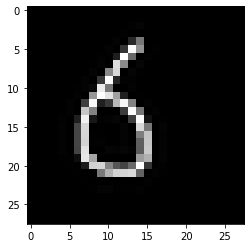

In [38]:
img = im.resize((28,28), Image.ANTIALIAS)
pixels = np.asarray(img, dtype='uint8')
pixels = np.invert(pixels)
pixels = np.resize(pixels, (28, 28))
plt.imshow(pixels,cmap=cm.gray)
x = pixels.reshape(28,28,1)
x = np.expand_dims(x, axis=0)

In [40]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)